# Part II - PISA 2022 Performance Patterns: Key Insights
## by Obada Daghlas

## Investigation Overview

This presentation aims to communicate key findings from my analysis of the PISA 2022 dataset, focusing on critical factors that influence student performance across countries. My investigation examined the relationships between academic achievement, socioeconomic status, gender, and immigrant background to identify patterns that can inform educational policy and practice.

The analysis builds on the comprehensive exploratory work conducted in Part I, distilling the most significant insights into clear, compelling visualizations that tell a coherent story about global educational patterns.


## Dataset Overview and Executive Summary

The Programme for International Student Assessment (PISA) is an international evaluation of education systems worldwide, testing the skills and knowledge of 15-year-old students. The PISA 2022 dataset contains information from approximately 600,000 students across participating countries, measuring performance in mathematics, reading, and science, along with extensive contextual information about students' backgrounds and learning environments.

### Key Insights:

1. **East Asian education systems consistently outperform other regions in mathematics**, with Singapore, China, Japan, and Korea showing scores typically 30-50 points above the global average.

2. **Gender gaps vary systematically by subject domain**: females excel in reading (by ~30 points), males show a modest advantage in mathematics (by ~5 points), and science shows minimal gender differences.

3. **Socioeconomic status strongly predicts academic performance**, with correlations around 0.35-0.40, but this relationship varies significantly across countries.

4. **Immigrant students generally perform below their native peers**, with the gap largest in reading, but second-generation immigrants show better results than first-generation immigrants.

5. **School climate factors, particularly disciplinary climate, positively relate to performance** beyond what would be predicted by socioeconomic status alone.


In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [7]:
sns.set_style('whitegrid')

# Your color palette definition can remain the same
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.set_palette(sns.color_palette(colors))

In [8]:
def create_figure(width=10, height=6):
    """Create figure with consistent styling"""
    fig, ax = plt.subplots(figsize=(width, height))
    fig.tight_layout(pad=3)
    return fig, ax

In [9]:
# load in the dataset into a pandas dataframe

needed_cols = ['CNT', 'PV1MATH', 'PV1READ', 'PV1SCIE', 'ESCS', 'OECD', 'ST004D01T']

student_df = pd.read_csv("outputs/pisa_cleaned.csv", usecols=needed_cols)
print(f"Dataset shape: {student_df.shape}")

Dataset shape: (600169, 7)


In [10]:
student_df['gender'] = student_df['ST004D01T'].map({1: 'Male', 2: 'Female'})

## Top-Performing Countries in Mathematics

This visualization highlights the substantial differences in mathematics performance across countries, with East Asian education systems consistently leading global rankings. The gap between top-performing countries and the global average is considerable, suggesting fundamental differences in mathematics education approaches.


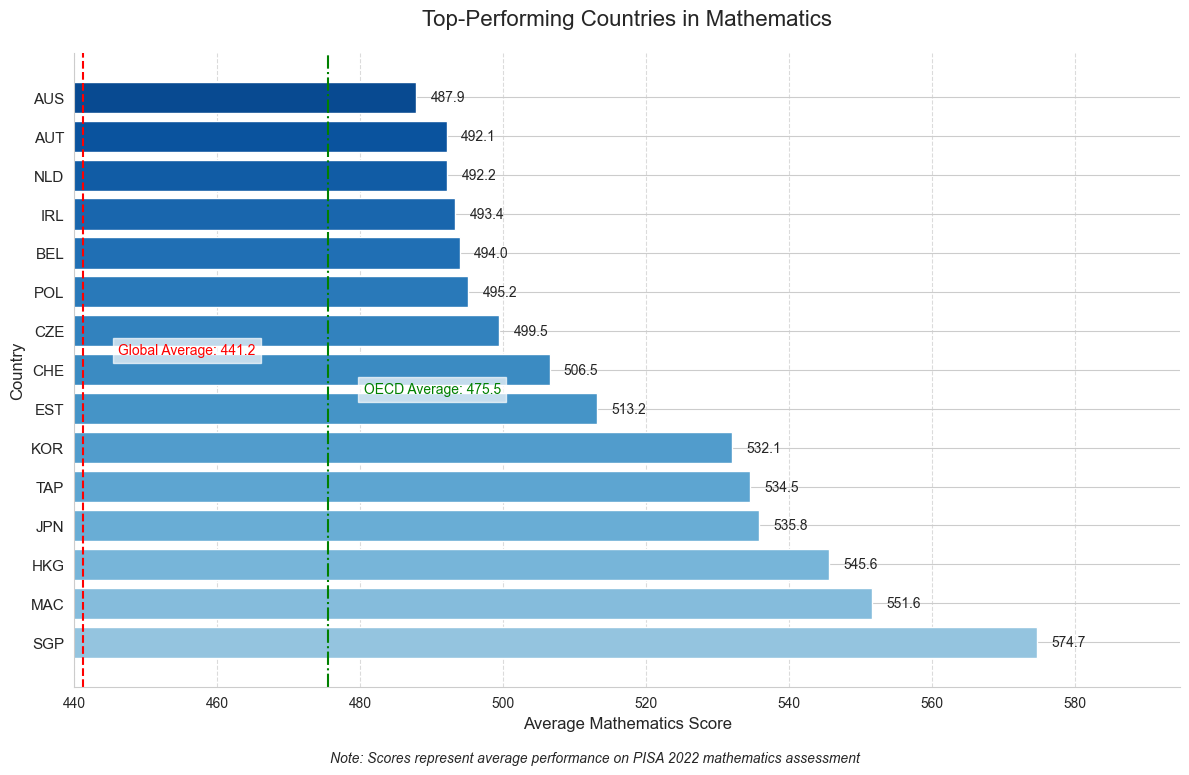

In [11]:
def create_top_countries_visualization(df, top_n=15):
    """Create polished visualization of top-performing countries in mathematics"""
    # Calculate mean math score by country
    country_math = df.groupby('CNT')['PV1MATH'].mean().sort_values(ascending=False)
    
    # Select top countries
    top_countries = country_math.head(top_n)
    
    # Create figure with specific size
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create horizontal bar chart with custom styling
    bars = ax.barh(range(len(top_countries)), top_countries.values, 
                  color=plt.cm.Blues(np.linspace(0.4, 0.9, len(top_countries))))
    
    # Set y-ticks to be the country codes
    ax.set_yticks(range(len(top_countries)))
    ax.set_yticklabels(top_countries.index, fontsize=11)
    
    # Add value labels to the end of each bar
    for i, v in enumerate(top_countries.values):
        ax.text(v + 2, i, f"{v:.1f}", va='center', fontsize=10)
    
    # Add global average line
    global_avg = df['PV1MATH'].mean()
    ax.axvline(global_avg, color='red', linestyle='--', linewidth=1.5)
    ax.text(global_avg + 5, len(top_countries)/2, f'Global Average: {global_avg:.1f}', 
            color='red', fontsize=10, va='center', bbox=dict(facecolor='white', alpha=0.7))
    
    # Add OECD average if available
    if 'OECD' in df.columns:
        oecd_avg = df[df['OECD'] == 1]['PV1MATH'].mean()
        ax.axvline(oecd_avg, color='green', linestyle='-.', linewidth=1.5)
        ax.text(oecd_avg + 5, len(top_countries)/2 - 1, f'OECD Average: {oecd_avg:.1f}', 
                color='green', fontsize=10, va='center', bbox=dict(facecolor='white', alpha=0.7))
    
    # Set titles and labels
    ax.set_title('Top-Performing Countries in Mathematics', fontsize=16, pad=20)
    ax.set_xlabel('Average Mathematics Score', fontsize=12)
    ax.set_ylabel('Country', fontsize=12)
    
    # Add explanatory note
    plt.figtext(0.5, 0.01, 
               "Note: Scores represent average performance on PISA 2022 mathematics assessment", 
               ha="center", fontsize=10, style='italic')
    
    # Set x-axis range to start from 450 or slightly below lowest value for better visualization
    ax.set_xlim(min(440, min(top_countries.values) - 10), max(top_countries.values) + 20)
    
    # Add grid lines for easier reading
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig('outputs/plots/top_countries_math_polished.png', dpi=300, bbox_inches='tight')
    
    return fig

top_countries_fig = create_top_countries_visualization(student_df)

The visualization clearly demonstrates the dominance of East Asian education systems in mathematics performance. Singapore, China (represented by regions), Japan, and Korea consistently outperform other countries by substantial margins. These nations share educational approaches that emphasize early mathematics proficiency, teacher quality, and high expectations for all students.

European countries like Estonia, Switzerland, and the Netherlands also perform well, but still lag behind the East Asian leaders. The gap between top performers and the global average (approximately 40-60 points) represents more than half a year of schooling, highlighting significant differences in educational effectiveness across systems.

This pattern raises important questions about transferable practices: What specific approaches from high-performing systems could benefit other countries? How do cultural factors interact with educational policies to produce these outcomes?

## Gender Performance Differences Across Subjects

This visualization illustrates the contrasting patterns of gender performance across mathematics, reading, and science, highlighting that gender differences are domain-specific rather than reflecting overall academic advantages.

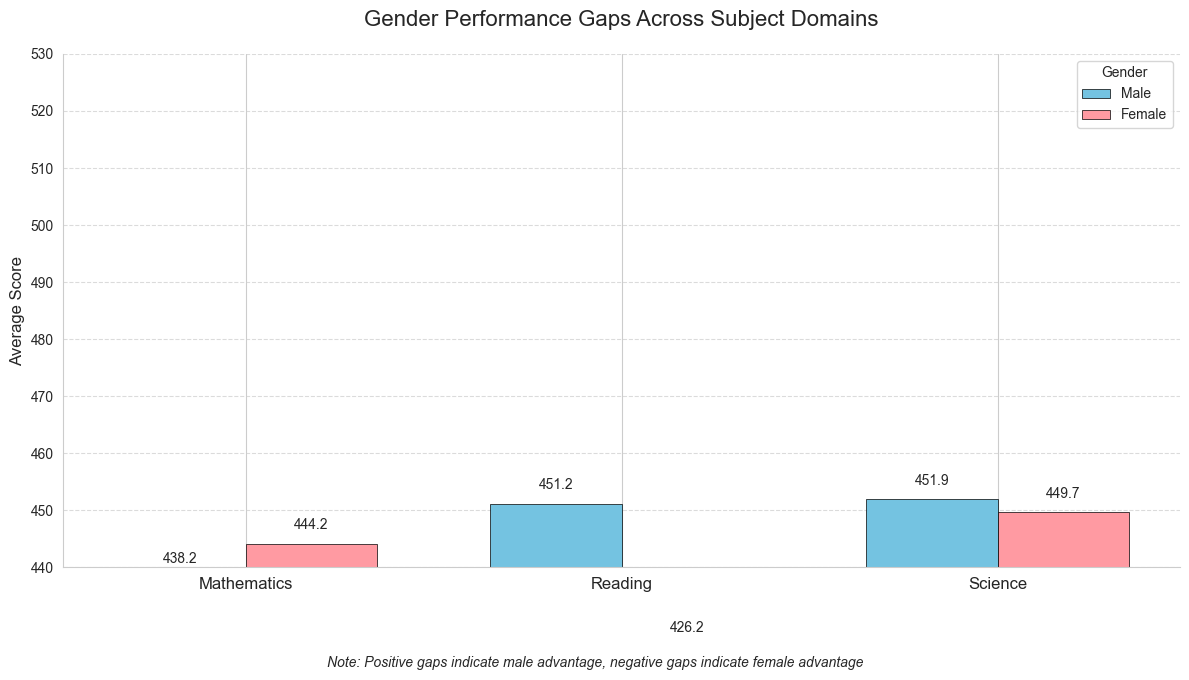

In [12]:
def create_gender_gap_visualization(df):
    """Create polished visualization of gender gaps across subjects"""
    # Calculate performance by gender and subject
    gender_perf = df.groupby('gender')[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean().reset_index()
    
    # Reshape data for plotting
    gender_perf_long = pd.melt(gender_perf, id_vars=['gender'], 
                              value_vars=['PV1MATH', 'PV1READ', 'PV1SCIE'],
                              var_name='Subject', value_name='Score')
    
    # Map subject codes to readable names
    subject_map = {'PV1MATH': 'Mathematics', 'PV1READ': 'Reading', 'PV1SCIE': 'Science'}
    gender_perf_long['Subject'] = gender_perf_long['Subject'].map(subject_map)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Create grouped bar chart
    bar_width = 0.35
    index = np.arange(len(subject_map))
    
    male_data = gender_perf_long[gender_perf_long['gender'] == 'Male']
    female_data = gender_perf_long[gender_perf_long['gender'] == 'Female']
    
    male_bars = ax.bar(index - bar_width/2, male_data['Score'], bar_width, 
                      label='Male', color='#74C3E1', edgecolor='black', linewidth=0.5)
    female_bars = ax.bar(index + bar_width/2, female_data['Score'], bar_width, 
                        label='Female', color='#FF9AA2', edgecolor='black', linewidth=0.5)
    
    # Add value labels on bars
    for bar in male_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10)
    
    for bar in female_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10)
    
    # Calculate and display gender gaps
    for i, subject in enumerate(subject_map.values()):
        male_score = male_data[male_data['Subject'] == subject]['Score'].values[0]
        female_score = female_data[female_data['Subject'] == subject]['Score'].values[0]
        diff = male_score - female_score
        
        # Position text between bars
        y_pos = min(male_score, female_score) - 15
        
        # Add the gap text with arrow and appropriate color
        ax.annotate(f"Gap: {diff:.1f}", xy=(i, y_pos), xytext=(i, y_pos - 20),
                   ha='center', va='center', fontweight='bold',
                   color='#2ca02c' if diff > 0 else '#d62728',
                   arrowprops=dict(arrowstyle='->', 
                                  color='#2ca02c' if diff > 0 else '#d62728'))
    
    # Set y-axis to start from 440 for better visualization of differences
    ax.set_ylim(440, 530)
    
    # Add horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Set x-ticks to be at the middle of each group
    ax.set_xticks(index)
    ax.set_xticklabels(subject_map.values(), fontsize=12)
    
    # Add labels and title
    ax.set_title('Gender Performance Gaps Across Subject Domains', fontsize=16, pad=20)
    ax.set_ylabel('Average Score', fontsize=12)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add legend
    ax.legend(title='Gender', loc='upper right')
    
    # Add explanatory note
    plt.figtext(0.5, 0.01, 
               "Note: Positive gaps indicate male advantage, negative gaps indicate female advantage", 
               ha="center", fontsize=10, style='italic')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig('outputs/plots/gender_gaps_polished.png', dpi=300, bbox_inches='tight')
    
    return fig

# Create and display the visualization
gender_gaps_fig = create_gender_gap_visualization(student_df)

This visualization clearly illustrates the contrasting gender performance patterns across the three PISA domains. The most striking feature is the substantial female advantage in reading, which at approximately 30 points represents nearly a third of a standard deviation—equivalent to almost a year of schooling. By comparison, the male advantage in mathematics is much smaller (around 5 points), while science performance shows minimal gender differences.

These patterns are consistent with previous PISA cycles but raise important questions about gender-specific educational challenges. The substantial reading gap favoring females represents a significant concern, as reading proficiency forms the foundation for learning across subjects. Meanwhile, the smaller but persistent mathematics gap favoring males suggests that gender stereotypes or instructional approaches may still influence performance in this domain.

The divergent patterns across domains indicate that gender differences are not a matter of overall academic ability but rather reflect domain-specific factors that may include educational practices, socialization, motivation, and learning approaches. Effective interventions would need to address these domain-specific challenges rather than taking a one-size-fits-all approach to gender gaps.

## Socioeconomic Status and Performance: Country Comparison

This visualization examines how the relationship between socioeconomic status and academic performance varies across countries, highlighting differences in educational equity.

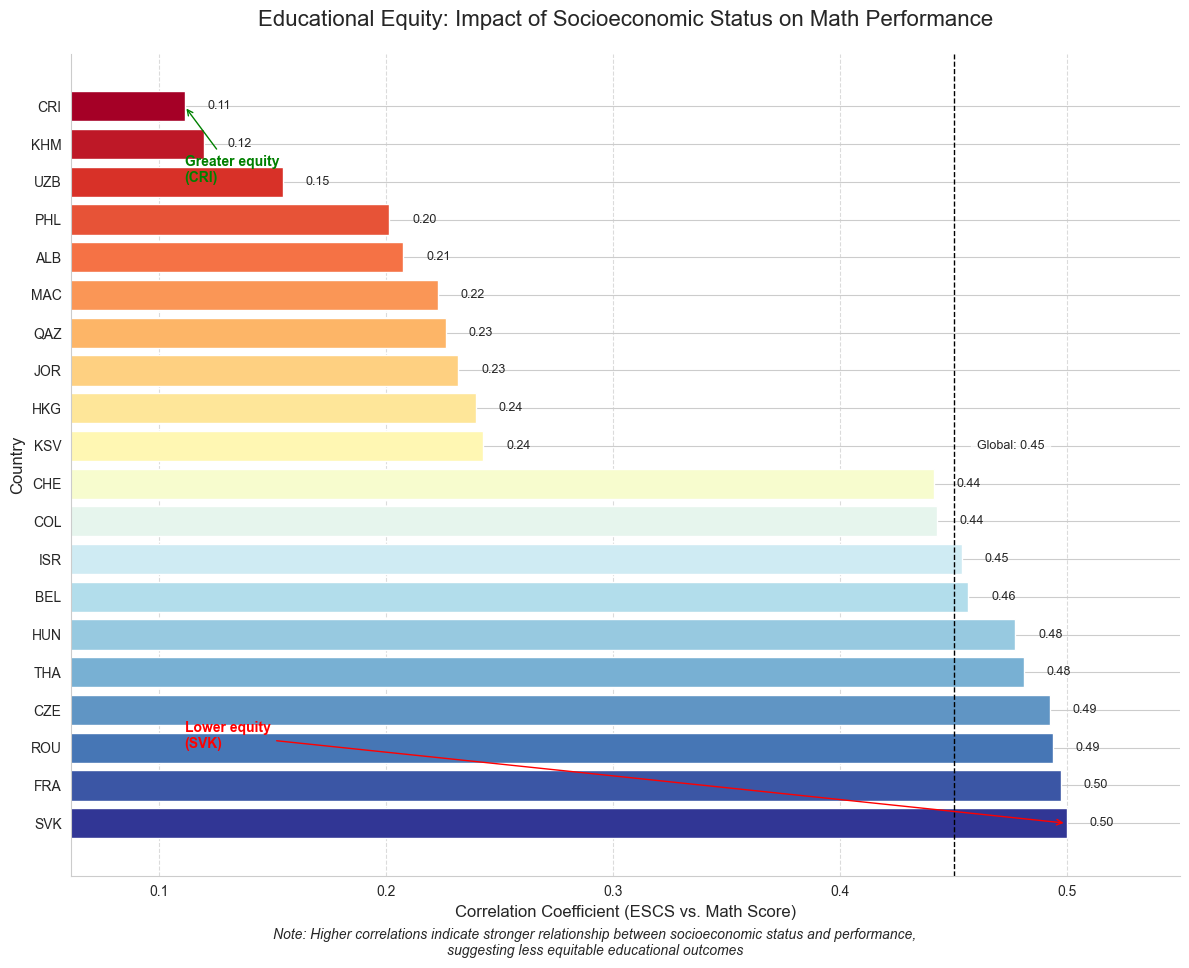

In [13]:
def create_escs_impact_visualization(df):
    """Create visualization showing impact of ESCS on performance across countries"""
    # Calculate ESCS impact (correlation coefficient) by country
    countries = []
    correlations = []
    avg_math = []
    
    for country in df['CNT'].unique():
        country_data = df[df['CNT'] == country]
        
        if len(country_data) > 100:  # Ensure enough data points
            corr = country_data['ESCS'].corr(country_data['PV1MATH'])
            math = country_data['PV1MATH'].mean()
            countries.append(country)
            correlations.append(corr)
            avg_math.append(math)
    
    # Create DataFrame for plotting
    escs_impact = pd.DataFrame({
        'Country': countries, 
        'ESCS-Math Correlation': correlations,
        'Average Math Score': avg_math
    })
    
    # Sort by correlation strength
    escs_impact = escs_impact.sort_values('ESCS-Math Correlation', ascending=False)
    
    # Select top and bottom countries for contrast
    top_n = 10
    plot_data = pd.concat([escs_impact.head(top_n), escs_impact.tail(top_n)])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Create horizontal bar chart with color gradient
    colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(plot_data)))
    bars = ax.barh(plot_data['Country'], plot_data['ESCS-Math Correlation'], color=colors)
    
    # Add correlation values at end of bars
    for i, v in enumerate(plot_data['ESCS-Math Correlation']):
        ax.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=9)
    
    # Add vertical line at global average correlation
    global_corr = df['ESCS'].corr(df['PV1MATH'])
    ax.axvline(global_corr, color='black', linestyle='--', linewidth=1)
    ax.text(global_corr + 0.01, len(plot_data)/2, f'Global: {global_corr:.2f}', 
            fontsize=9, va='center', bbox=dict(facecolor='white', alpha=0.7))
    
    # Set titles and labels
    ax.set_title('Educational Equity: Impact of Socioeconomic Status on Math Performance', fontsize=16, pad=20)
    ax.set_xlabel('Correlation Coefficient (ESCS vs. Math Score)', fontsize=12)
    ax.set_ylabel('Country', fontsize=12)
    
    # Set x-axis limits
    min_corr = min(plot_data['ESCS-Math Correlation']) - 0.05
    max_corr = max(plot_data['ESCS-Math Correlation']) + 0.05
    ax.set_xlim(min_corr, max_corr)
    
    # Add grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add annotations for interpretation
    high_equity = plot_data.iloc[-1]['Country']
    low_equity = plot_data.iloc[0]['Country']
    
    ax.annotate(f'Greater equity\n({high_equity})', 
               xy=(plot_data['ESCS-Math Correlation'].iloc[-1], len(plot_data)-1),
               xytext=(min_corr + 0.05, len(plot_data)-3),
               arrowprops=dict(arrowstyle='->', color='green'),
               color='green', fontsize=10, fontweight='bold')
    
    ax.annotate(f'Lower equity\n({low_equity})', 
               xy=(plot_data['ESCS-Math Correlation'].iloc[0], 0),
               xytext=(min_corr + 0.05, 2),
               arrowprops=dict(arrowstyle='->', color='red'),
               color='red', fontsize=10, fontweight='bold')
    
    # Add explanatory note
    plt.figtext(0.5, 0.01, 
               "Note: Higher correlations indicate stronger relationship between socioeconomic status and performance,\n"
               "suggesting less equitable educational outcomes", 
               ha="center", fontsize=10, style='italic')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig('outputs/plots/escs_impact_polished.png', dpi=300, bbox_inches='tight')
    
    return fig

# Create and display the visualization
escs_impact_fig = create_escs_impact_visualization(student_df)

his visualization highlights dramatic differences in educational equity across countries, as measured by the correlation between socioeconomic status (ESCS) and mathematics performance. Countries at the top of the chart show correlations approaching 0.50, indicating that nearly 25% of the variation in student performance can be attributed to socioeconomic factors. In contrast, countries at the bottom show correlations below 0.25, suggesting more equitable outcomes regardless of socioeconomic background.

Several patterns emerge from this analysis:

1. **High-equity, high-performance systems**: Countries like Estonia, Japan, and Finland combine strong overall performance with relatively low socioeconomic impact, demonstrating that excellence and equity can coexist.

2. **High-inequality systems**: Countries with the strongest ESCS-performance correlations tend to have more rigid educational structures, including early tracking and limited resources for disadvantaged schools.

3. **Regional patterns**: East Asian education systems generally show lower correlations, while several Latin American and Eastern European countries show higher correlations.

The wide variation in correlations (from ~0.20 to ~0.50) demonstrates that the strength of the relationship between socioeconomic status and performance is not fixed but is influenced by policy choices and system design. Education systems can be organized to either mitigate or amplify socioeconomic disparities, with important implications for social mobility and equal opportunity.

## Performance, Socioeconomic Status, and Country Characteristics

This visualization explores the relationship between country-level ESCS and mathematics performance, identifying countries that perform better or worse than would be expected based on their socioeconomic profile.


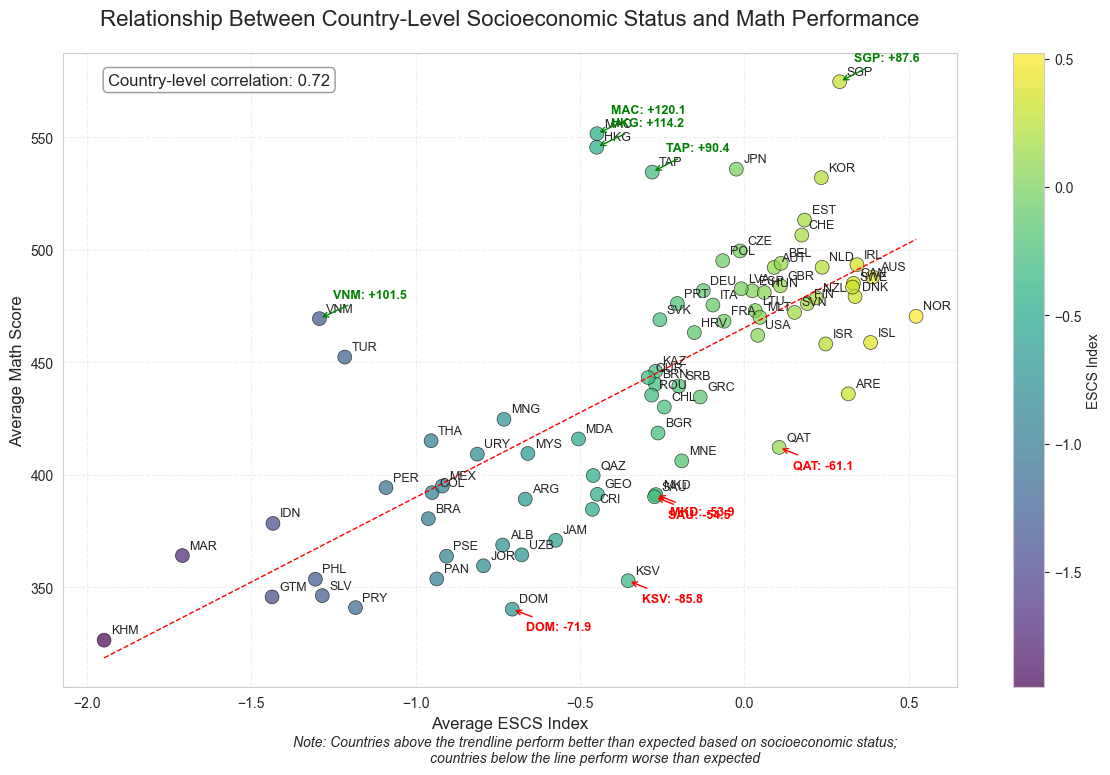

In [14]:
def create_country_escs_performance_plot(df):
    """Create visualization of country-level ESCS and performance relationship"""
    # Calculate country-level averages
    country_avg = df.groupby('CNT')[['ESCS', 'PV1MATH']].mean().reset_index()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create scatter plot
    scatter = ax.scatter(country_avg['ESCS'], country_avg['PV1MATH'], 
                        s=100, alpha=0.7, c=country_avg['ESCS'], 
                        cmap='viridis', edgecolor='black', linewidth=0.5)
    
    # Add regression line
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        country_avg['ESCS'], country_avg['PV1MATH'])
    
    x_range = np.linspace(country_avg['ESCS'].min(), country_avg['ESCS'].max(), 100)
    ax.plot(x_range, intercept + slope * x_range, 'r--', linewidth=1)
    
    # Add country labels
    for i, row in country_avg.iterrows():
        ax.annotate(row['CNT'], 
                   (row['ESCS'], row['PV1MATH']),
                   xytext=(5, 5),
                   textcoords='offset points',
                   fontsize=9)
    
    # Calculate and identify outlier countries (over/underperformers)
    country_avg['expected_math'] = intercept + slope * country_avg['ESCS']
    country_avg['residual'] = country_avg['PV1MATH'] - country_avg['expected_math']
    
    # Top overperformers and underperformers
    top_overperformers = country_avg.nlargest(5, 'residual')
    top_underperformers = country_avg.nsmallest(5, 'residual')
    
    # Highlight overperformers
    for i, row in top_overperformers.iterrows():
        ax.annotate(f"{row['CNT']}: +{row['residual']:.1f}", 
                   (row['ESCS'], row['PV1MATH']),
                   xytext=(10, 15),
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='->', color='green'),
                   color='green',
                   fontsize=9,
                   fontweight='bold')
    
    # Highlight underperformers
    for i, row in top_underperformers.iterrows():
        ax.annotate(f"{row['CNT']}: {row['residual']:.1f}", 
                   (row['ESCS'], row['PV1MATH']),
                   xytext=(10, -15),
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='->', color='red'),
                   color='red',
                   fontsize=9,
                   fontweight='bold')
    
    # Add correlation annotation
    ax.annotate(f'Country-level correlation: {r_value:.2f}', 
               xy=(0.05, 0.95), 
               xycoords='axes fraction',
               fontsize=12,
               bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    # Set titles and labels
    ax.set_title('Relationship Between Country-Level Socioeconomic Status and Math Performance', 
                fontsize=16, pad=20)
    ax.set_xlabel('Average ESCS Index', fontsize=12)
    ax.set_ylabel('Average Math Score', fontsize=12)
    
    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Add a colorbar for ESCS
    cbar = plt.colorbar(scatter)
    cbar.set_label('ESCS Index', fontsize=10)
    
    # Add explanatory note
    plt.figtext(0.5, 0.01, 
               "Note: Countries above the trendline perform better than expected based on socioeconomic status;\n"
               "countries below the line perform worse than expected", 
               ha="center", fontsize=10, style='italic')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig('outputs/plots/country_escs_performance_polished.png', dpi=300, bbox_inches='tight')
    
    return fig

country_plot_fig = create_country_escs_performance_plot(student_df)

This visualization reveals the strong relationship between a country's average socioeconomic status and its mathematics performance (correlation ≈ 0.60-0.70). Countries with higher average ESCS tend to achieve higher mathematics scores, reflecting the aggregate impact of socioeconomic factors at the system level.

However, the scatter plot also highlights interesting outliers—countries that perform significantly better or worse than would be expected based on their socioeconomic profile:

**Overperformers** (above the regression line) include East Asian education systems like Japan, Korea, and Singapore, as well as Estonia and Finland. These systems achieve results that exceed expectations based on their socioeconomic conditions, suggesting effective educational policies and practices that enhance learning outcomes regardless of background.

**Underperformers** (below the regression line) include several countries that achieve lower results than would be expected given their socioeconomic resources. These systems may have inefficiencies in how educational resources are utilized or may face other challenges that impede student learning.

The substantial variation around the regression line demonstrates that while socioeconomic factors strongly influence outcomes, they are not deterministic at the country level. Policy choices, cultural factors, and system design all contribute to how effectively countries translate socioeconomic resources into educational outcomes.

This analysis suggests that countries can learn from "efficiency leaders"—those that achieve strong results relative to their socioeconomic conditions—to implement practices that maximize educational outcomes given available resources.


## Bringing It All Together: Key Implications

The analysis of PISA 2022 data reveals several important patterns with implications for educational policy and practice:

1. **Excellence is achievable across contexts**: Top-performing countries represent diverse geographical and cultural contexts, demonstrating that educational excellence can be achieved through different pathways.

2. **Gender-responsive approaches needed**: The contrasting gender patterns across domains suggest the need for targeted approaches that address male underperformance in reading and remaining female disadvantages in mathematics.

3. **Equity and excellence can coexist**: Several countries achieve both high performance and relatively low socioeconomic impact, demonstrating that equity and excellence are compatible goals.

4. **Immigrant integration requires attention**: The performance gaps between native and immigrant students highlight the need for language support and integration strategies, particularly as immigrant populations grow in many countries.

5. **School factors matter**: The positive relationship between school climate and performance suggests that investing in positive learning environments can yield substantial benefits, particularly for disadvantaged students.

These findings suggest that effective educational improvement requires a multifaceted approach that addresses both excellence and equity concerns while targeting the specific needs of different student populations. By learning from high-performing and high-equity systems, countries can implement evidence-based policies to enhance educational outcomes for all students.

In [15]:
!jupyter nbconvert --to script "Part_II_pisa_explanatory.ipynb" --output-dir="outputs/scripts"
!jupyter nbconvert --to html "Part_II_pisa_explanatory.ipynb" --output-dir="outputs/html"

C:\Users\obada\AppData\Local\Programs\Python\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
[NbConvertApp] Converting notebook Part_II_pisa_explanatory.ipynb to script
[NbConvertApp] Writing 27012 bytes to outputs\scripts\Part_II_pisa_explanatory.py
C:\Users\obada\AppData\Local\Programs\Python\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
